# Preparing working environnement

In [1]:
# Importing librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Allowing modules autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# importing data
data = pd.read_pickle('openfoodfact_data.pkl')

# Exploring data

In [3]:
# Data visualisation
data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Columns of the dataset
for c in data.columns:
    print (c)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
image_ingredients_url
image_ingredients_sm

In [5]:
# Number of rows and columns in the dataset
print(data.shape)

(1093528, 178)


Given the important amount of data, first cleaning to proceed : keeping only data related to France to reduce the number of rows in our dataset

## Selecting products sold in France

In [6]:
# Availiable countries in the dataset
data['countries'].value_counts()

France                                                              418941
United States                                                       173620
en:es                                                                63485
en:fr                                                                58590
en:france                                                            54791
en:FR                                                                28877
en:spain                                                             22213
España                                                               18167
Deutschland                                                          13349
Suisse                                                               12107
en:be                                                                11514
en:France                                                             8764
en:BE                                                                 8038
en:ch                    

In [7]:
countries_list = pd.DataFrame(data['countries'].value_counts())

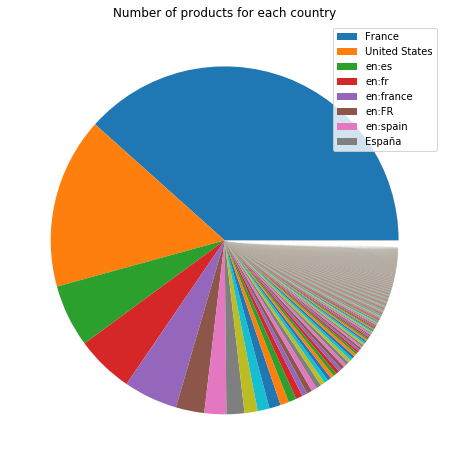

In [8]:
# Plotting
plt.figure(figsize = (8,8))
plt.pie(data['countries'].value_counts())
plt.legend(countries_list.index[:8], loc = 'upper right')
plt.title("Number of products for each country")
plt.show()

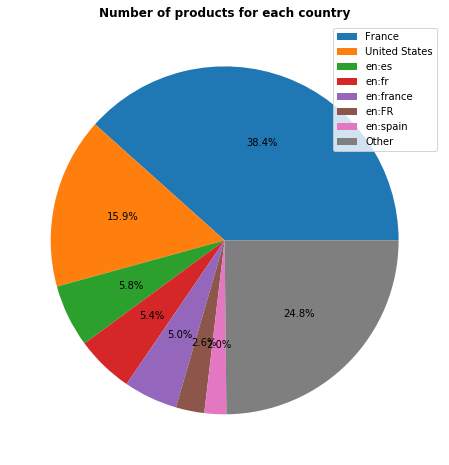

In [9]:
# Plotting 
from PSanté_01_scripts import cut_pie
cut_pie(countries_list, cut_off = 0.02, title = "Number of products for each country")

In [10]:
# selecting data for products sold in France
# [^iI] to exclude products sold in Africa but not in France
data_fr = data[data['countries'].str.contains(r"([Ff][Rr][^iI])", na = False)].copy()

# Comparing size of the data sets
data_fr.shape[0]/data.shape[0]

C:\Users\alexa_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


0.5030140974899591

Nearly half of the initial rows have be removed thanks to focus on France

In [11]:
# Number of remaining products
len(data_fr)

550060

In [12]:
# Products per category
data_fr['pnns_groups_2'].value_counts()

unknown                             316518
Biscuits and cakes                   19957
Sweets                               18245
One-dish meals                       17565
Cheese                               13899
Processed meat                       13614
Dressings and sauces                 11248
Meat                                  9633
Cereals                               9502
Fish and seafood                      9237
Milk and yogurt                       8947
Alcoholic beverages                   7408
Chocolate products                    6916
Sweetened beverages                   6856
Fruits                                6635
Fats                                  6627
Vegetables                            6443
Salty and fatty products              5954
Appetizers                            5324
Bread                                 5212
Fruit juices                          4578
Unsweetened beverages                 3523
Breakfast cereals                     3391
Dairy desse

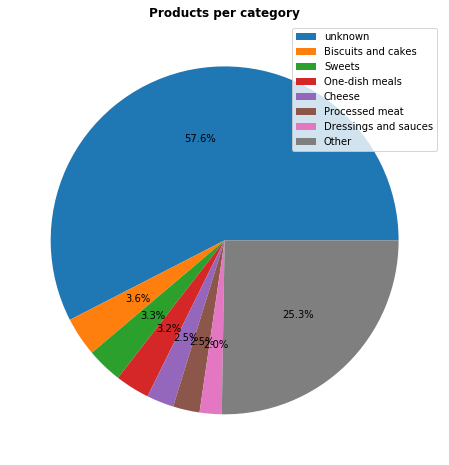

In [13]:
cut_pie(pd.DataFrame(data_fr['pnns_groups_2'].value_counts()), cut_off = 0.02, title = "Products per category")

## Duplicates

In [14]:
# Number of unique codes
data_fr['code'].unique().size

549959

In [15]:
# Percentage of unique codes
data_fr['code'].unique().size / data_fr.shape[0]

0.9998163836672364

In [16]:
# Examples of duplicated codes
data_fr[~data_fr['code'].duplicated(keep = False)].sort_values(by = ['code']).head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000208,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1544207680,2018-12-07T18:34:40Z,1544207683,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000284,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1547120245,2019-01-10T11:37:25Z,1563551052,2019-07-19T15:44:12Z,Pain maïs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Number of unique lines 
data_fr.drop_duplicates().shape[0]

550047

# Empty columns

Groups of columns are based on the categories defined here : 
https://world.openfoodfacts.org/data/data-fields.txt

In [18]:
# Creation of columns groups
General_information = ['code','url','creator','created_t','created_datetime','last_modified_t',
                      'last_modified_datetime', 'product_name', 'generic_name', 'quantity']

Tags = ['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags',
        'categories_en','origins','origins_tags','manufacturing_places','manufacturing_places_tags',
        'labels','labels_tags','labels_en','emb_codes','emb_codes_tags','first_packaging_code_geo',
        'cities','cities_tags','purchase_places','stores','countries','countries_tags','countries_en']

Ingredients = ['ingredients_text', 'traces', 'traces_tags', 'traces_en','image_ingredients_url', 
               'image_ingredients_small_url', 'allergens', 'allergens_en']

Misc = ['serving_size','serving_quantity','no_nutriments','additives_n','additives','additives_tags','additives_en',
        'ingredients_from_palm_oil_n','ingredients_from_palm_oil','ingredients_from_palm_oil_tags',
        'ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil',
        'ingredients_that_may_be_from_palm_oil_tags','main_category','main_category_en','image_url',
        'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url','nutriscore_score', 'nutriscore_grade', 
        'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en']

Nutrition_facts = [col for col in data_fr.columns if '_100g' in col]
             
Groups = [General_information, Tags, Ingredients, Misc, Nutrition_facts]

In [19]:
# Checking that every column belongs in a columns group
treated_col = General_information + Tags + Ingredients + Misc + Nutrition_facts
[col for col in data_fr.columns if col not in treated_col]

[]

## Visualisation of columns fillrates

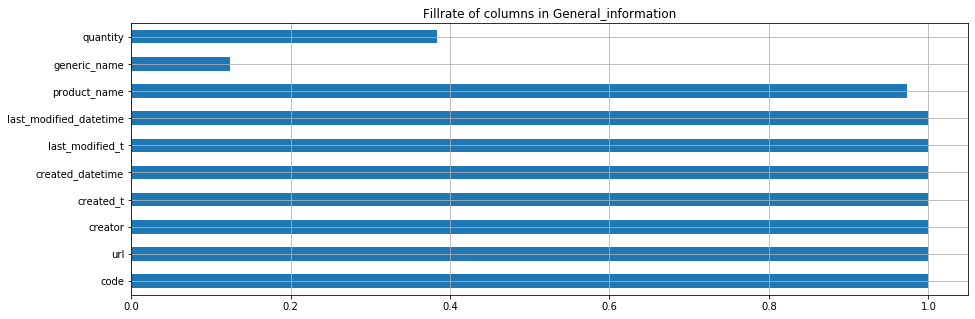

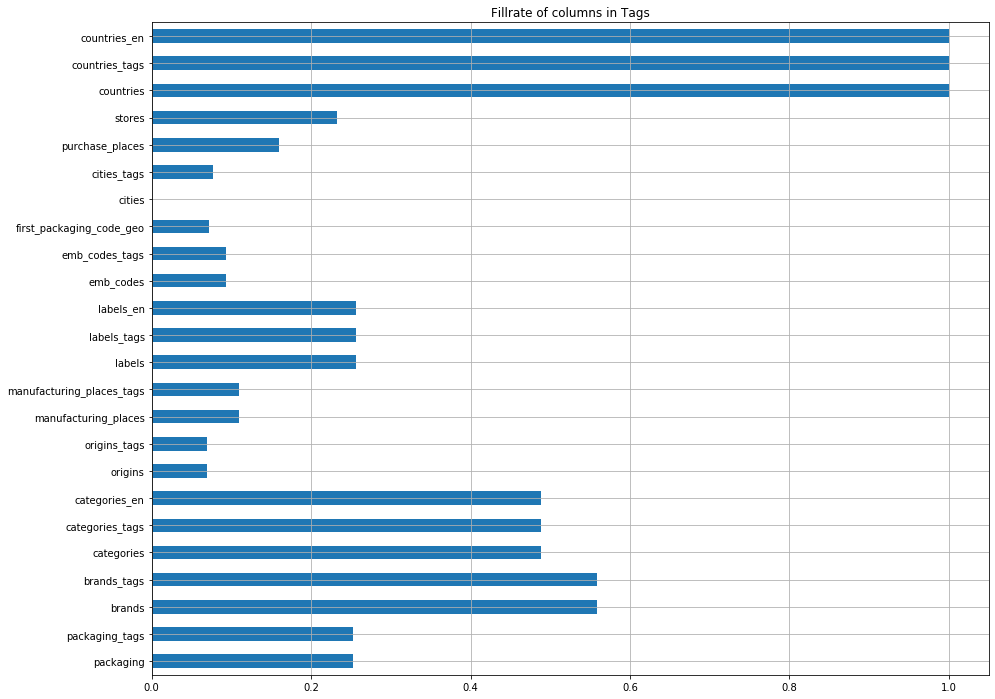

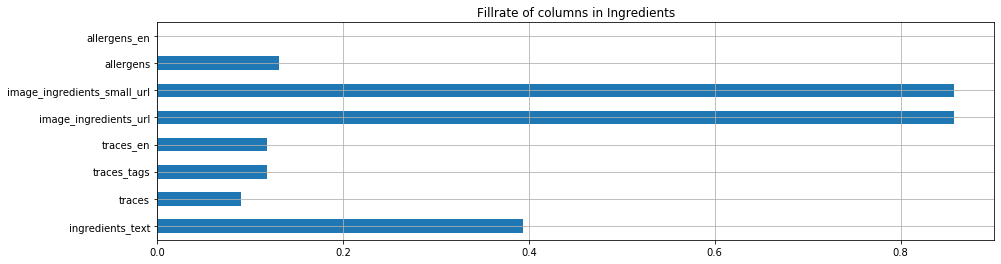

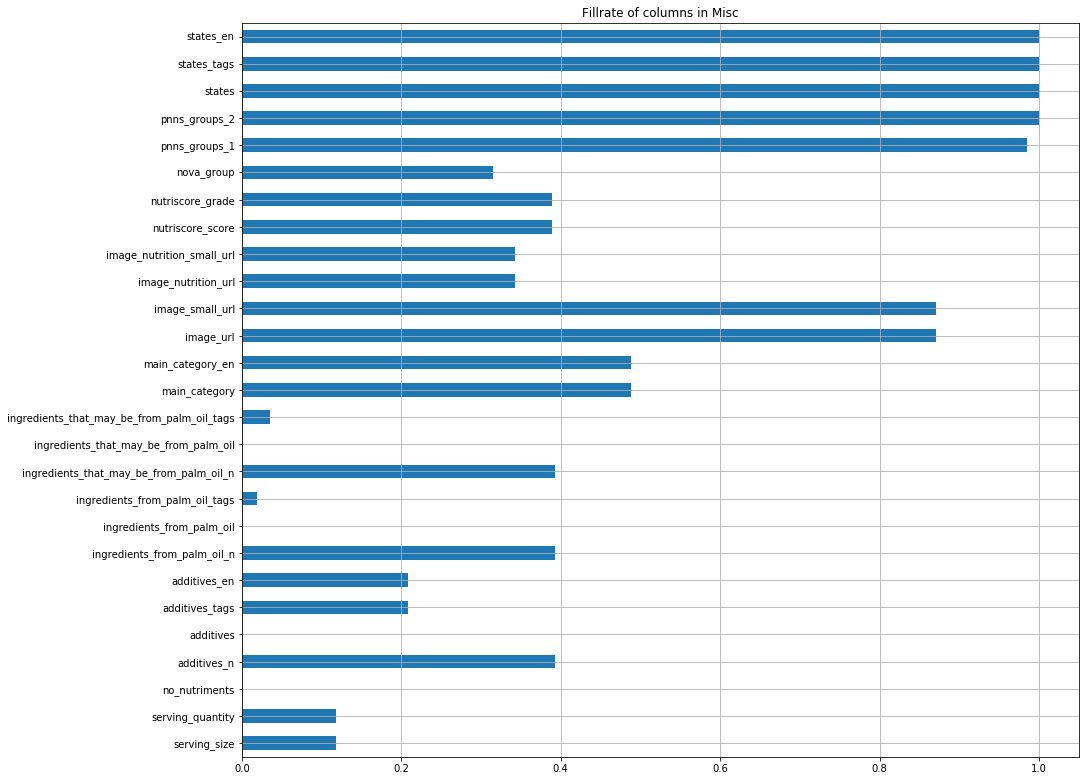

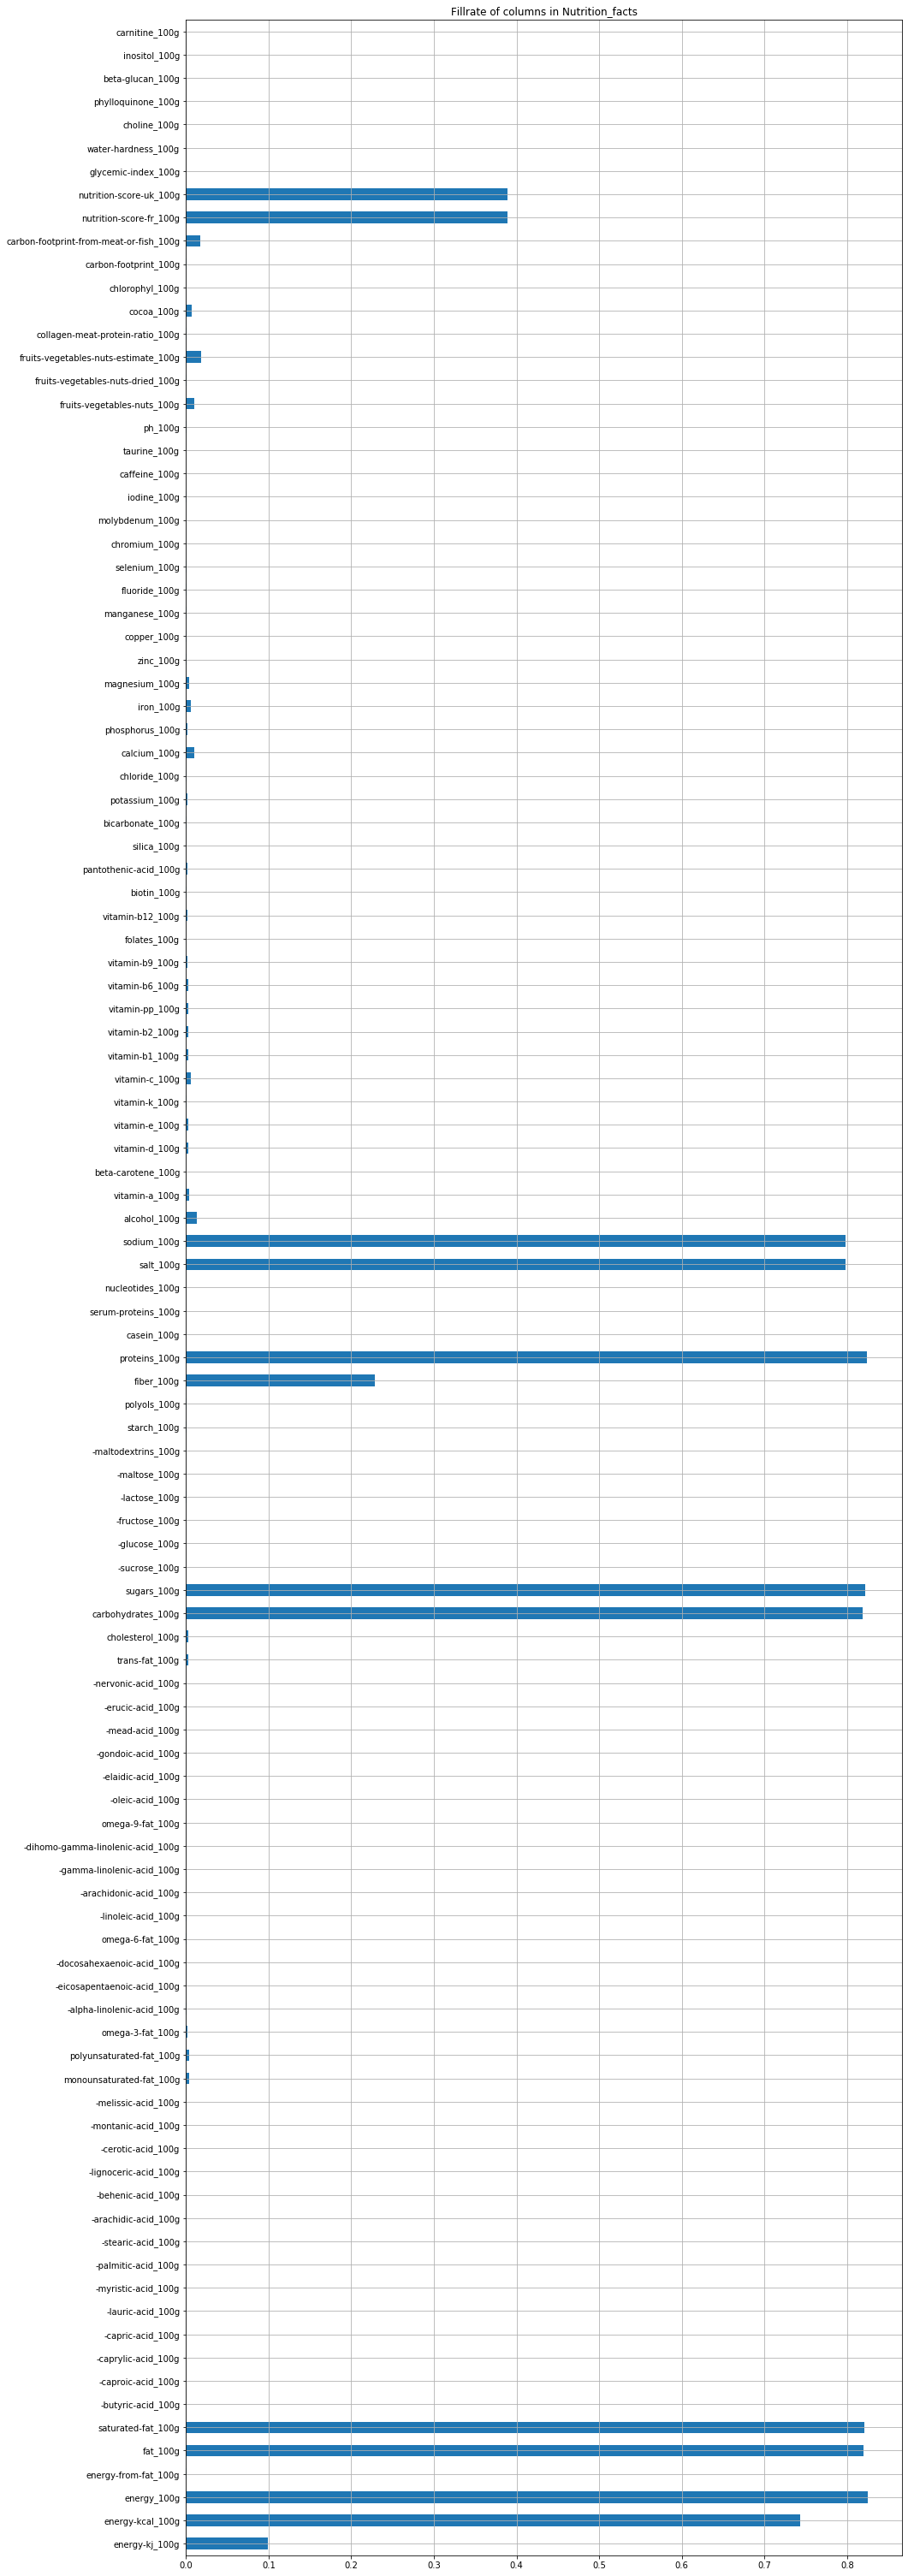

In [21]:
# Fillrates of dataset columns
from PSanté_01_scripts import df_fillrates
from PSanté_01_scripts import retrieve_name

for group in Groups:
    group_name = retrieve_name(group)[0]
    df_fillrates(data_fr[group], group_name)

In [22]:
len(data_fr[Nutrition_facts].columns)

109

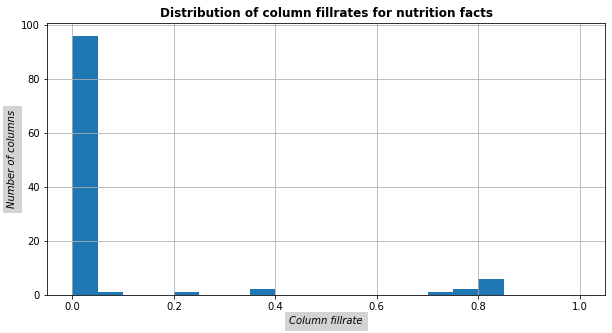

In [23]:
# Distribution of fillrates
plt.figure(figsize = (10,5))
plt.hist(data_fr[Nutrition_facts].count() / data_fr.shape[0], range = (0,1), bins = 20)

plt.grid(True)
plt.xlabel("Column fillrate", backgroundcolor = 'lightgrey', fontstyle = 'italic', fontsize = 10)
plt.ylabel("Number of columns", backgroundcolor = 'lightgrey', fontstyle = 'italic', fontsize = 10)
plt.title("Distribution of column fillrates for nutrition facts", fontweight = 'bold', fontsize = 12)

plt.show()

In [24]:
# Nutrition columns with few data
s = data_fr[Nutrition_facts].count().sort_values()
s.where(s<100).dropna()

-erucic-acid_100g                     0.0
-lignoceric-acid_100g                 0.0
-behenic-acid_100g                    0.0
-dihomo-gamma-linolenic-acid_100g     0.0
-stearic-acid_100g                    0.0
-palmitic-acid_100g                   0.0
-myristic-acid_100g                   0.0
-melissic-acid_100g                   0.0
-capric-acid_100g                     0.0
-nervonic-acid_100g                   0.0
-caproic-acid_100g                    0.0
-butyric-acid_100g                    0.0
-mead-acid_100g                       0.0
water-hardness_100g                   0.0
-gondoic-acid_100g                    0.0
-elaidic-acid_100g                    0.0
-caprylic-acid_100g                   0.0
chlorophyl_100g                       1.0
-cerotic-acid_100g                    1.0
-montanic-acid_100g                   1.0
-arachidic-acid_100g                  2.0
-gamma-linolenic-acid_100g            3.0
-lauric-acid_100g                     3.0
glycemic-index_100g               

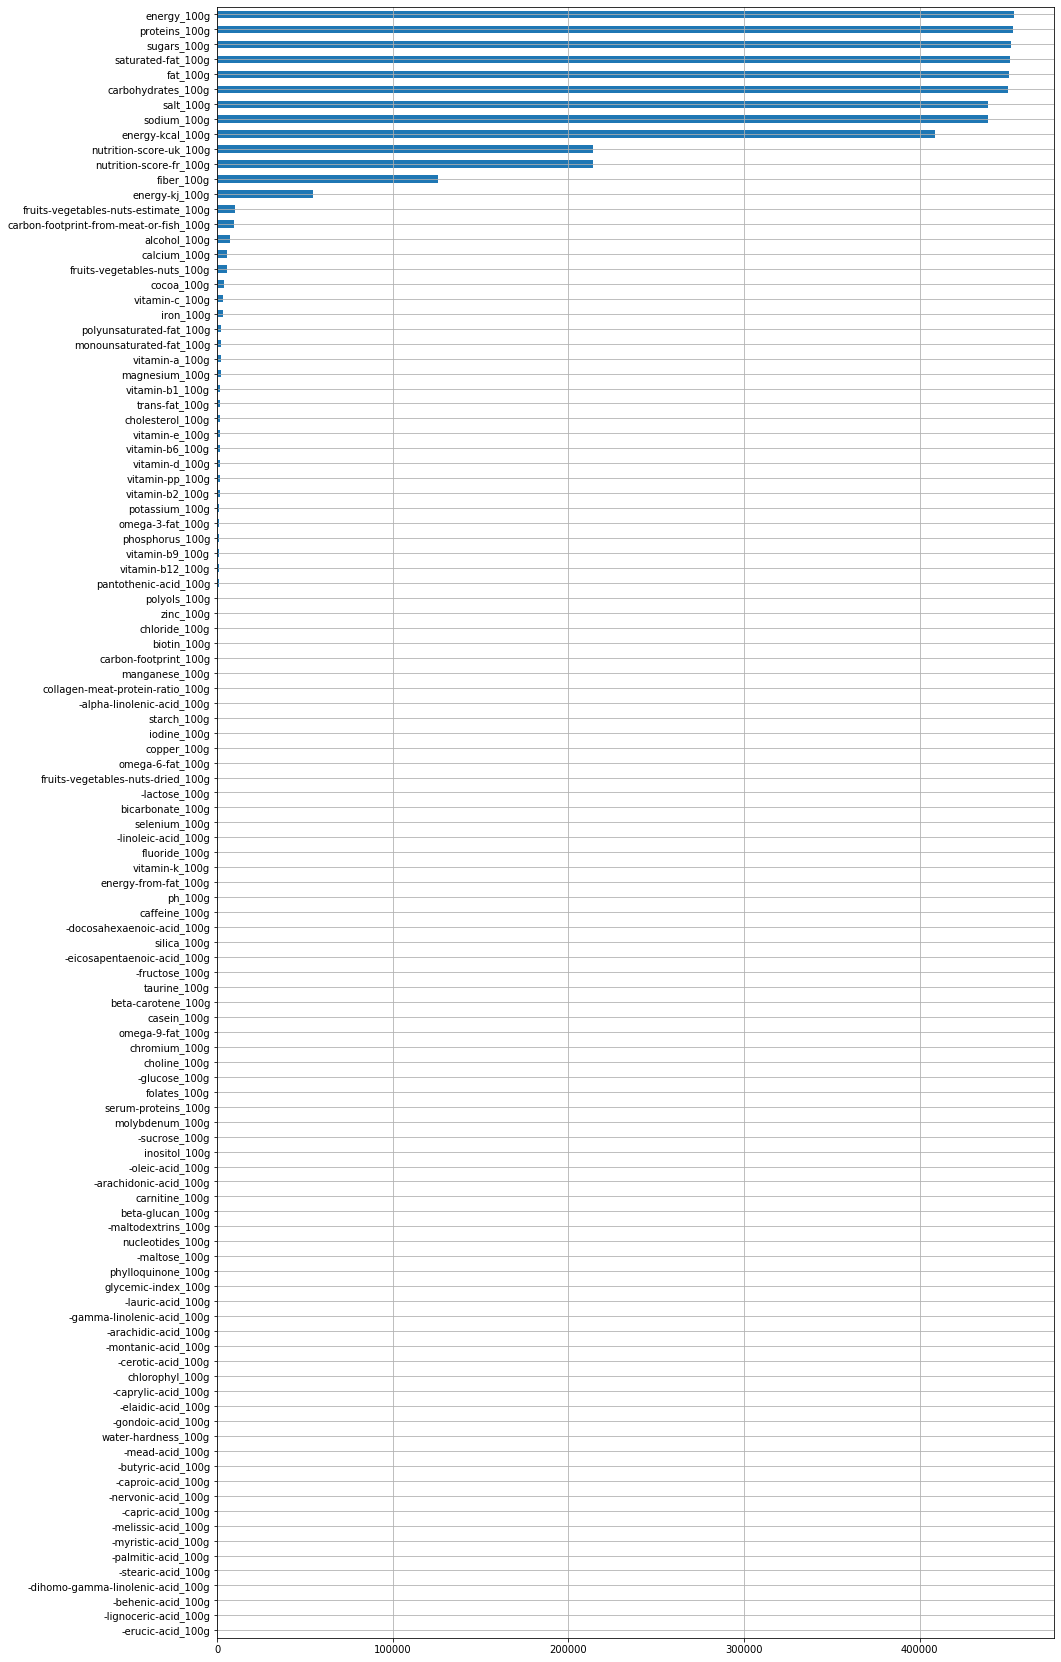

In [25]:
# Ordering columns per fillrates
s.plot.barh(figsize = (15,30))
plt.grid(True)

## Examples of nutrition facts with few data

### Caffeine

In [26]:
# Checking wether coffee products without caffeine information
data_fr[data_fr['caffeine_100g'].isna() & data_fr['generic_name'].str.contains('Café')][['product_name','generic_name']]

,product_name,generic_name
71225,McCafé Frappé Caramel,Coffee beverage - McCafé Frappé Caramel
86248,McCafé Torréfaction Mi-Noire,McCafé Torréfaction Mi-Noire
139455,Miel de Caféier,Miel de Caféier
254547,Mpanga Naturel - Café Coutume,Café en grains
254548,Buenos Aires - Café Coutume,Café en grains
254549,Café 7 estrellas,Café en grains
254550,Heirloom Coffee - Coop Biftu Gudina,Café
254551,Café Tana Toraja - Café Belleville,Café en grains
254552,Café Panama Finca Bambito - Green Plantation C...,Café en grains
254555,Café Villa Galicia Natural - Café Coutume,Café en grains


In [27]:
# Percentage of coffee products without caffeine information
p_caffeine = len(data_fr[data_fr['caffeine_100g'].isna() & data_fr['generic_name'].str.contains('Café')]
   )/len(data_fr[data_fr['generic_name'].str.contains('Café', na = False)])

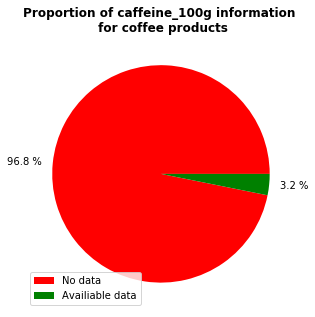

In [28]:
plt.figure(figsize = (5,5))
plt.pie([p_caffeine, 1- p_caffeine], 
        labels = [str(100 * round(p_caffeine, 3)) + " %", str(100 * round(1 - p_caffeine ,3)) + " %"], 
        colors = ['red', 'green'])
plt.title("Proportion of caffeine_100g information \n for coffee products", fontweight = 'bold')
plt.legend(["No data", "Availiable data"], loc = 'lower left')
plt.show()

### Alcohol

In [29]:
# Checking wether alcoholic products without alcohol information
data_fr[data_fr['alcohol_100g'].isna() & data_fr['pnns_groups_2'].str.contains('Alcoholic beverages')][
    ['product_name','generic_name']]

,product_name,generic_name
1445,Five hop lager beer,NaN
1649,NaN,NaN
2824,Havanna Club 3 Jahre,NaN
12456,2013 Joseph Drouhin Rully Blanc,NaN
17996,Biere,NaN
17997,Bud,NaN
18058,Merlot,NaN
34409,Cidre du pays d' Othe,NaN
70750,Kentish,NaN
78626,NaN,NaN


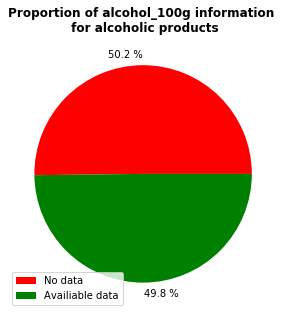

In [30]:
# Percentage of alcoholic products without alcohol information
p_alcohol = len(data_fr[data_fr['alcohol_100g'].isna() & data_fr['pnns_groups_2'].str.contains('Alcohol')]
   )/len(data_fr[data_fr['pnns_groups_2'].str.contains('Alcohol', na = False)])

plt.figure(figsize = (5,5))
plt.pie([p_alcohol, 1- p_alcohol], 
        labels = [str(100 * round(p_alcohol, 3)) + " %", str(100 * round(1 - p_alcohol ,3)) + " %"], 
        colors = ['red', 'green'])
plt.title("Proportion of alcohol_100g information \n for alcoholic products", fontweight = 'bold')
plt.legend(["No data", "Availiable data"], loc = 'lower left')
plt.show()

## Dropping empty columns

In [31]:
# Dropping empty columns
from PSanté_01_scripts import drop_empty_col
data_cleaned = drop_empty_col(data_fr, min_value = 20)

37 columns out of 178 have been dropped of the dataframe


In [32]:
# Reshaping the groups of columns
General = [col for col in General_information if col in data_cleaned.columns]
Tag = [col for col in Tags if col in data_cleaned.columns]
Ingred = [col for col in Ingredients if col in data_cleaned.columns]
Misc = [col for col in Misc if col in data_cleaned.columns]
Nutr_facts = [col for col in Nutrition_facts if col in data_cleaned.columns]

Groups_cleaned = [General, Tag, Ingred, Misc, Nutrition_facts]

# Cleaning values

## Looking for absurd values

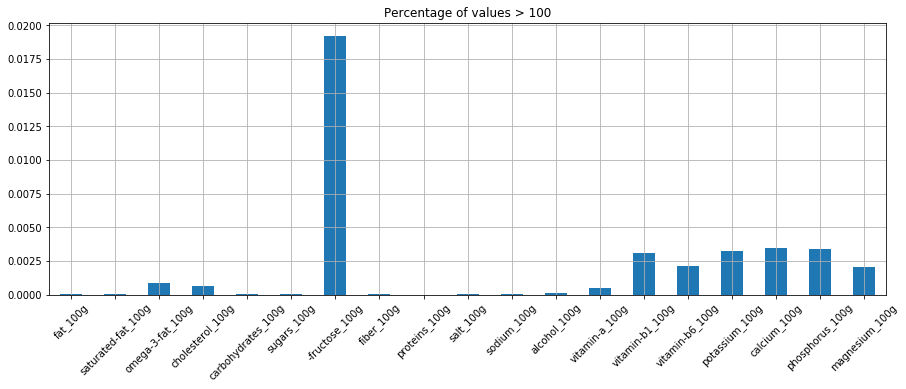

In [33]:
# Selecting columns about nutrient contents in g
Nutr_facts2 = [c for c in Nutr_facts if c not in [
    'energy-kj_100g', 'energy-kcal_100g','energy_100g', 'energy-from-fat_100g',
    'carbon-footprint_100g', 'carbon-footprint-from-meat-or-fish_100g']]

# Percentage of values above 100g for 100g of product
from PSanté_01_scripts import df_excess_rates
df_excess_rates(data_cleaned[Nutr_facts2], limit = 100)

Many columns contain values above 100g while giving the nutrient weight for 100g of product.

## Distribution of values : example on nutriscore criteria

In [34]:
# Useful columns for nutriscore
gr_nutriscore = ['nutriscore_score', 'nutriscore_grade',
                 'energy_100g', 'energy-kcal_100g', 'energy-kj_100g',
                 'saturated-fat_100g',
                 'fruits-vegetables-nuts-estimate_100g','fruits-vegetables-nuts_100g',
                 'sodium_100g',
                 'sugars_100g',
                 'proteins_100g',
                 'fiber_100g',
                 'salt_100g'
                ]

### Boxplots

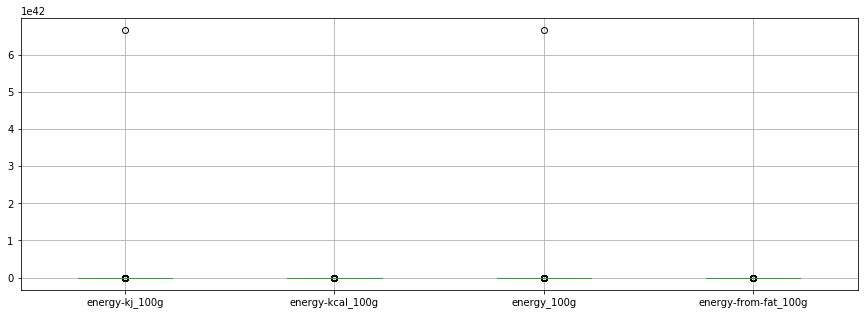

In [35]:
# Distribution of values for energy related columns
data[['energy-kj_100g','energy-kcal_100g','energy_100g','energy-from-fat_100g']].boxplot(figsize = (15,5))
plt.show()

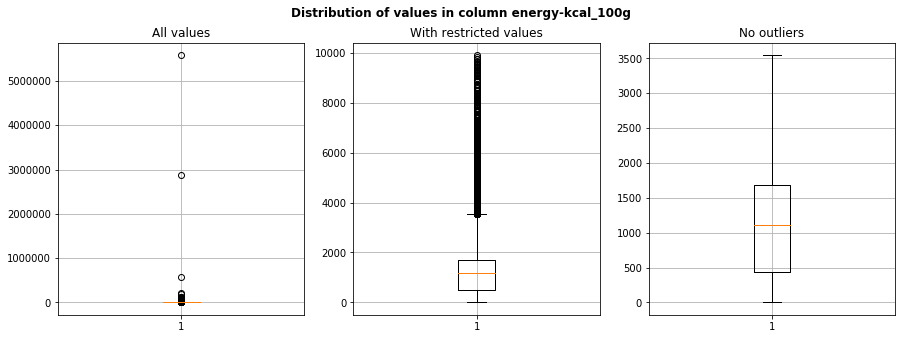

In [36]:
from PSanté_01_scripts import both_boxplot
both_boxplot(data, 'energy-kcal_100g', up_bound = 10000)

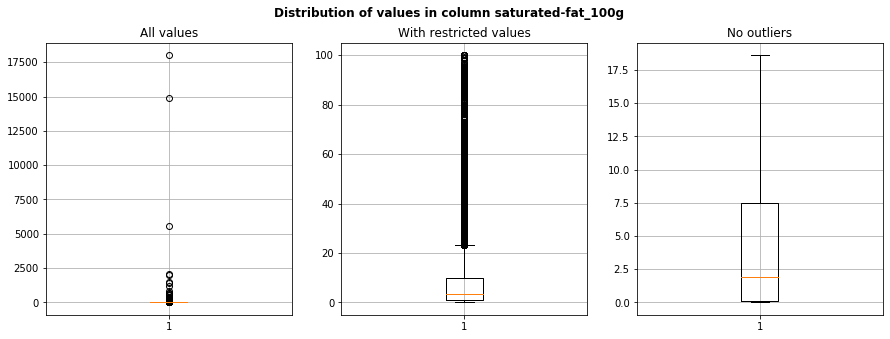

In [37]:
# Distribution of values for saturated fats columns
both_boxplot(data, 'saturated-fat_100g', up_bound = 100)

### Values at percentiles

In [ ]:
# Values at percentiles
from PSanté_01_scripts import plot_percentile
plot_percentile(data_cleaned[gr_nutriscore[2:5]], max_p = 95, title = "Values per percentile in energy-related columns")
plot_percentile(data_cleaned[gr_nutriscore[6:8]], title = "Values per percentile for fruit & veggie related columns")
plot_percentile(data_cleaned[gr_nutriscore[8:]], max_p = 95, 
                title = "Values per percentile in other nutriscore criteria columns")

On the selected columns, that have quite high fillrates compared to the others nutrition facts columns, percentiles are quite linearly distributed, up to the 95-th percentile. Above this limit, values of percentiles drastically increase, and can reach absurd values.

For the cleaning of the dataframe, values above the 95-th percentile will thus be removed. 

### Removing values above 95-th percentile

In [ ]:
# Replacing values > 95-th percentile by NaN
data_cleaned[Nutr_facts] = data_cleaned[Nutr_facts].mask(data_cleaned[Nutr_facts] > data_cleaned[Nutr_facts].quantile(0.95))

In [ ]:
# Checking that absurd values are no longer present in the dataset
df_excess_rates(data_cleaned[Nutr_facts2], limit = 100)

# Selecting columns for the analysis

In [ ]:
data_selection = data_cleaned[
    ['code','product_name', 'generic_name', 'categories', 'categories_tags','categories_en', 'main_category',
     'main_category_en','pnns_groups_1', 'pnns_groups_2', 'nutriscore_score', 'nutriscore_grade'] + Nutr_facts ]

In [ ]:
data_selection.columns

# Saving the cleaned dataframe

In [ ]:
data_selection.to_pickle('PSanté_03_data_cleaned.pkl')